<span style='color:#795548'>**BÀI 1**</span>


In [2]:
import numpy as np 
import matplotlib.pyplot as plt 

from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.metrics import accuracy_score

In [3]:
samples = datasets.load_breast_cancer()
samples.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

Số ác tính:  212
Sớ lành tính:  357


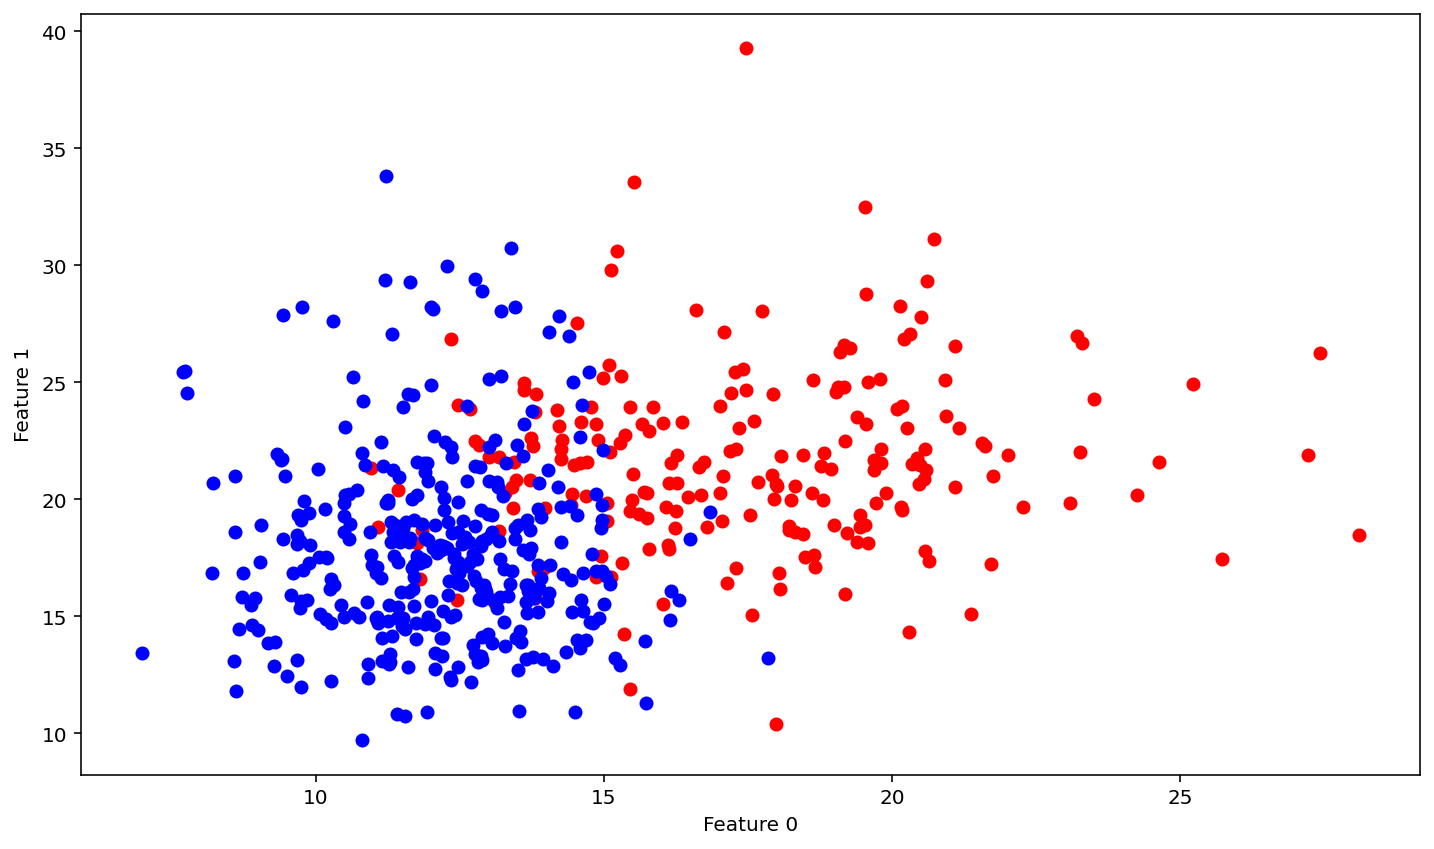

In [4]:
# Load the breast cancer dataset
samples = datasets.load_breast_cancer()
X = samples.data  # Use the data attribute to get the feature matrix
y = samples.target

# Split the data into M (malignant) and B (benign) classes
M_class = X[y == 0]
B_class = X[y == 1]

print("Số ác tính: ", len(M_class))
print("Sớ lành tính: ", len(B_class))

# Plot the data
plt.xlabel("Feature 0")  # Replace with the actual feature names
plt.ylabel("Feature 1")  # Replace with the actual feature names
plt.scatter(M_class[:, 0], M_class[:, 1], color='red', label='Malignant')
plt.scatter(B_class[:, 0], B_class[:, 1], color='blue', label='Benign')


In [5]:
logreg = LogisticRegression()

In [6]:
logreg.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

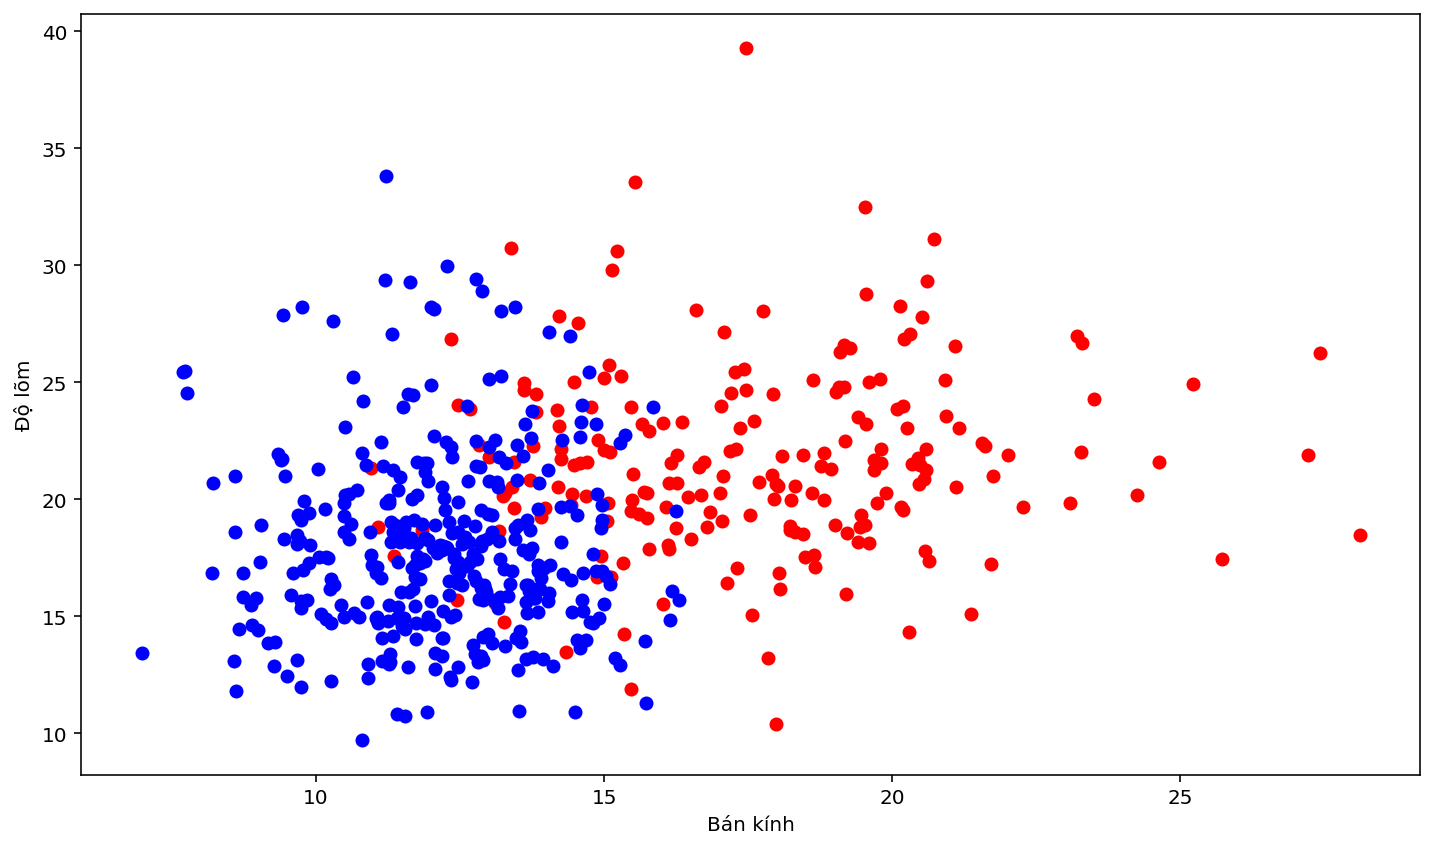

In [7]:
plt.xlabel("Bán kính")
plt.ylabel("Độ lõm")
y_pred=logreg.predict(X)
M_class_pred=np.array([X[i] for i in range(len(y)) if y_pred[i]==0])
#Dự đoán nhóm Ác tính (malignant)
B_class_pred=np.array([X[i] for i in range(len(y)) if y_pred[i]==1])
#Dự đoán của nhóm Lành tính (benign)
plt.scatter(M_class_pred[:,0],M_class_pred[:,1],color='red')
plt.scatter(B_class_pred[:,0],B_class_pred[:,1],color='blue')

In [8]:
 accuracy_score(y, y_pred)

0.9472759226713533

In [9]:
# Load a sample dataset for demonstration (you can replace this with your data)
iris = datasets.load_iris()
X = iris.data[:, :2]  # We'll use the first two features for simplicity
y = iris.target

# Create and fit a logistic regression model
logreg = LogisticRegression()
logreg.fit(X, y)

# Define new data for prediction
need_prediction = np.array([[16.5, 0.078], [15.2, 0.241], [13.9, 0.013]])

# Make predictions
pred = logreg.predict(need_prediction)

# Define class labels
class_labels = iris.target_names

# Map class labels to custom labels
custom_labels = {
    class_labels[0]: "âm tính/không xác định",
    class_labels[1]: "âm tính",
    class_labels[2]: "dương tính"
}

# Display predictions with custom labels
for i, element in enumerate(need_prediction):
    label = custom_labels[class_labels[pred[i]]]
    print(f"Bệnh nhân có chỉ số (Bán kính, Độ lõm nhân tế bào) là ({element[0]:.1f}, {element[1]:.3f}) có kết quả {label} với ung thư")

Bệnh nhân có chỉ số (Bán kính, Độ lõm nhân tế bào) là (16.5, 0.078) có kết quả dương tính với ung thư
Bệnh nhân có chỉ số (Bán kính, Độ lõm nhân tế bào) là (15.2, 0.241) có kết quả dương tính với ung thư
Bệnh nhân có chỉ số (Bán kính, Độ lõm nhân tế bào) là (13.9, 0.013) có kết quả dương tính với ung thư


<span style='color:#795548'>**BÀI 2**</span>


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
import pandas as pd

df = pd.read_csv('new_adult_data.csv')
df

,0,1,2,3,4,5,6,7,8,9,...,95,96,97,98,99,100,101,102,103,104
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.000503,0.999607,0.000168,0.028035,0.0,0.000516,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.000600,1.000000,0.000156,0.000000,0.0,0.000156,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.000176,1.000000,0.000042,0.000000,0.0,0.000185,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.000226,1.000000,0.000030,0.000000,0.0,0.000170,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000083,1.000000,0.000038,0.000000,0.0,0.000118,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45303,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.000267,1.000000,0.000080,0.000000,0.0,0.000256,1.0
45304,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.000235,1.000000,0.000063,0.000000,0.0,0.000222,1.0
45305,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.000782,0.999999,0.000174,0.000000,0.0,0.000678,1.0
45306,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.000189,1.000000,0.000065,0.000000,0.0,0.000194,1.0


In [13]:
df.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '95', '96', '97', '98', '99', '100', '101', '102', '103', '104'],
      dtype='object', length=105)

In [14]:
x = df.iloc[:,0:104]
y = df.iloc[:,104]
X_train, X_valid, Y_train, Y_valid = train_test_split(x, y, test_size = 0.2, random_state = 101)


In [15]:
classifier = LogisticRegression(max_iter=500)
classifier.fit(X_train, Y_train)

LogisticRegression(max_iter=500)

In [16]:
classifier.score(X_train, Y_train)

0.8585499089554709

In [17]:
classifier.score(X_valid, Y_valid)


0.8562127565658795

In [18]:
df_test = pd.read_csv('new_adult_test.csv')
df_test


,0,1,2,3,4,5,6,7,8,9,...,95,96,97,98,99,100,101,102,103,104
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.000110,1.000000,0.000031,0.000000,0.0,0.000176,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.000423,1.000000,0.000100,0.000000,0.0,0.000557,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.000083,1.000000,0.000036,0.000000,0.0,0.000119,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.000274,0.998852,0.000062,0.047898,0.0,0.000249,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.000171,1.000000,0.000030,0.000000,0.0,0.000151,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.000135,1.000000,0.000053,0.000000,0.0,0.000163,0.0
15056,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.000181,1.000000,0.000060,0.000000,0.0,0.000167,0.0
15057,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.000101,1.000000,0.000035,0.000000,0.0,0.000133,0.0
15058,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.000523,0.997892,0.000155,0.064888,0.0,0.000476,0.0


In [19]:
# Tách biến không phụ thuộc (indepedent variable)
x_test = df_test.iloc[:, 0:104]
# Tách biến phụ thuộc (depedent variable)
y_test = df_test.iloc[:,104]


In [20]:
y_pred = classifier.predict(x_test)

In [21]:
metrics.accuracy_score(y_test, y_pred)

0.8067065073041169

In [22]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[9348, 2012],
       [ 899, 2801]])

Text(0.5, 257.44, 'Predicted label')

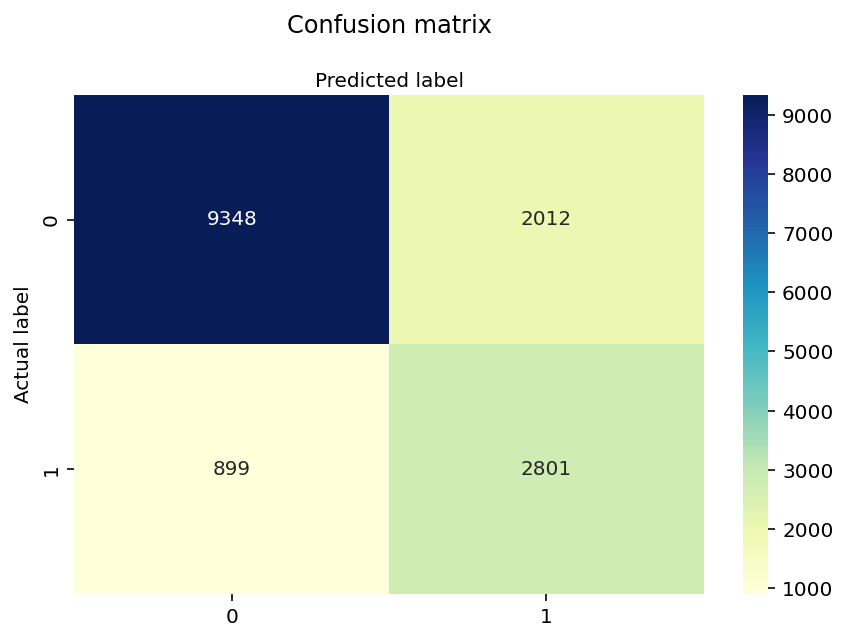

In [23]:
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [24]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.82      0.87     11360
         1.0       0.58      0.76      0.66      3700

    accuracy                           0.81     15060
   macro avg       0.75      0.79      0.76     15060
weighted avg       0.83      0.81      0.81     15060



In [25]:
print("Accuracy:(Độ chính xác)",metrics.accuracy_score(y_test, y_pred))
print("Precision: (Độ chuẩn xác)",metrics.precision_score(y_test, y_pred))
print("Recall: (Độ bao phủ)",metrics.recall_score(y_test, y_pred))

Accuracy:(Độ chính xác) 0.8067065073041169
Precision: (Độ chuẩn xác) 0.5819655100768751
Recall: (Độ bao phủ) 0.7570270270270271
